<a href="https://colab.research.google.com/github/Machachane/Applied-Statistics-and-Data-Visualisation/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Start with some simple example text

simple_text = 'This isn\'t a real text, this is as example text... Notice this contains punctuation!!'

In [3]:
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')

tokenized_document = tokenizer.tokenize(simple_text)

print(tokenized_document)

['This', "isn't", 'a', 'real', 'text', 'this', 'is', 'as', 'example', 'text', 'Notice', 'this', 'contains', 'punctuation']


In [4]:
stop_words =nltk.corpus.stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
# Remove stopwords using list comprehension

cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]

print(cleaned_tokens)

['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [6]:
# Explore lemmatization vs stemming

lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words = ['cacti','sings','hopped','rocks','better','easily']
pos = ['n','v','v','n','a','r']
lemmatized_words = [lemmatizer.lemmatize(words[i], pos=pos[i]) for i in range(6)]
stemmed_words = [stemmer.stem(word) for word in words]

print("Lemmatized words: ", lemmatized_words)
print("Stemmed words: ", stemmed_words)

Lemmatized words:  ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']
Stemmed words:  ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [7]:
# Now carry outstemming on our example sentence

stemmed_text = [stemmer.stem(word) for word in cleaned_tokens]

print(stemmed_text)

['real', 'text', 'exampl', 'text', 'notic', 'contain', 'punctuat']


In [8]:
# Lets now create a function to apply all of our data preprocessing steps which we can then use on a corpus

def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) # Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] # Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] # Stemming
  return stemmed_text

In [9]:
data = pd.read_csv("SMSSpamCollection.txt",sep="\t",header=None)
data.columns = ["Target_Label","Text"]

data.head()

,Target_Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
print("\n All Data Labels")
print(data.groupby("Target_Label").count())


 All Data Labels
              Text
Target_Label      
ham           4825
spam           747


In [11]:
data['Text'] = data['Text'].apply(preprocess_text)

data.head()

,Target_Label,Text
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,"[ok, lar, joke, wif, u, oni]"
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"[nah, think, goe, usf, live, around, though]"


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Text'].map(' '.join))
X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

X.head()

,00,000,000pe,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zebra,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

y =data['Target_Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=99)

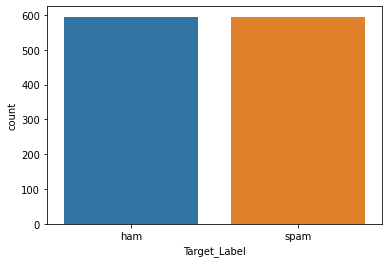

In [14]:
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_undersampled)

In [15]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_undersampled, y_train_undersampled)


MultinomialNB()

In [16]:
y_pred = model.predict(X_test)

# Computing the accuracy and Making the Confusion Matrix
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print('accuracy: %.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm, '\n\n')
print('---------------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n",)
print(result)

accuracy: 0.94


Confusion Matrix:
[[898  65]
 [  5 147]] 


---------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

         ham       0.99      0.93      0.96       963
        spam       0.69      0.97      0.81       152

    accuracy                           0.94      1115
   macro avg       0.84      0.95      0.89      1115
weighted avg       0.95      0.94      0.94      1115



**Part 2 - Sentiment Analysis**

In [17]:
print(preprocess_text('This movie is great'))
print(preprocess_text('This movie is not great'))

['movi', 'great']
['movi', 'great']


In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('This movie is great'))
print(sentiment.polarity_scores('This movie is not great'))

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [19]:
# Nowlets read in our review data - we're going to use this for our analysis

reviews = pd.read_csv('Reviews_of_Amazon_Products.csv')

reviews.head()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username
0,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-09-03T00:00:00.000Z,I thought it would be as big as small paper bu...,Too small,llyyue
1,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-06-06T00:00:00.000Z,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi
2,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-20T00:00:00.000Z,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo
3,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-11-02T17:33:31.000Z,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry
4,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-24T00:00:00.000Z,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack


In [20]:
reviews.describe()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username
count,1123,1123,1123,1123,1123,1123,1123,1123
unique,2,7,1,2,237,1048,820,983
top,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",Amazon,Electronics,2017-01-23T00:00:00.000Z,I am really enjoying my new kindle fire hd 8. ...,Great tablet,Mike
freq,1016,797,1123,1112,48,3,56,5


In [21]:
# We can extract the values from the dictionary and create new columns within our dataframe

reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['reviews.text']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['reviews.text']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['reviews.text']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['reviews.text']]

In [22]:
reviews.head()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username,compound,neg,neu,pos
0,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-09-03T00:00:00.000Z,I thought it would be as big as small paper bu...,Too small,llyyue,0.7329,0.081,0.709,0.210
1,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-06-06T00:00:00.000Z,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,0.5826,0.000,0.744,0.256
2,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-20T00:00:00.000Z,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,0.3612,0.085,0.772,0.143
3,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-11-02T17:33:31.000Z,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,0.9727,0.000,0.843,0.157
4,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-24T00:00:00.000Z,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,0.9072,0.000,0.661,0.339


In [23]:
reviews[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,1123.000000,1123.000000,1123.000000,1123.000000
mean,0.623324,0.033545,0.694907,0.271563
std,0.347236,0.058432,0.147549,0.152466
min,-0.867400,0.000000,0.230000,0.000000
25%,0.493900,0.000000,0.592000,0.163000
50%,0.750600,0.000000,0.705000,0.259000
75%,0.865800,0.055500,0.800500,0.380000
max,0.999200,0.475000,1.000000,0.689000


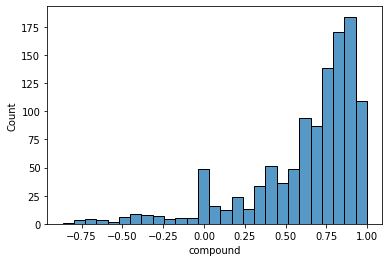

In [24]:
sns.histplot(reviews['compound'])

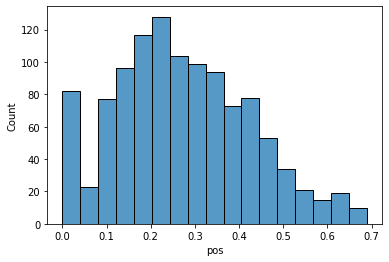

In [25]:
sns.histplot(reviews['pos'])

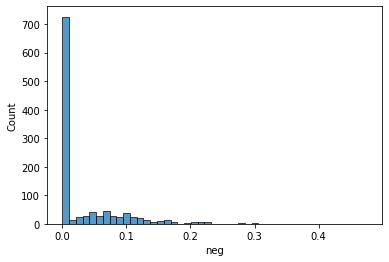

In [26]:
sns.histplot(reviews['neg'])

In [27]:
# Lets look at how many negative reviews we have per product

(reviews['compound']<=0).groupby(reviews['name']).sum()

name
Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)                                         12
Fire HD 8 Tablet,  Wi-Fi, 16 GB-Magenta                                                       67
Fire HD 8 Tablet,  Wi-Fi, 32 GB-Black                                                          5
Fire HD 8 Tablet,  Wi-Fi, 32 GB-Magenta                                                        5
Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue                                                            1
Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue                                                           10
Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers     1
Name: compound, dtype: int64

In [28]:
# Calculate as percentage of total reviews

percent_negative = pd.DataFrame((reviews['compound']<=0).groupby(reviews['name']).sum()
                                /reviews['name'].groupby(reviews['name']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews')

percent_negative

,% negative reviews
name,
"Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue",1.960784
"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",8.406524
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Black",8.620690
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",9.090909
"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",12.500000
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Magenta",12.500000
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",14.285714


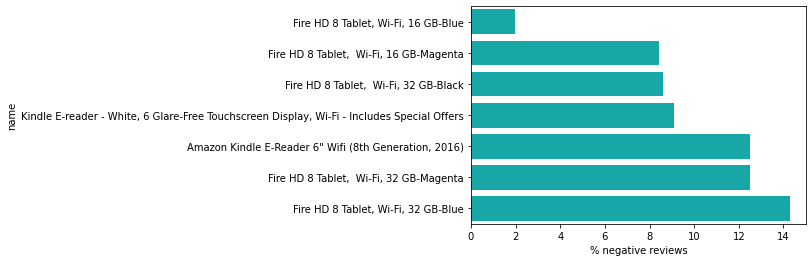

In [29]:
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='c')

In [30]:
# Process the text data ready for wordcloud visualisation, using the function we defined earlier

# For this part of the exercise we will focus specifically on Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta

reviews['processed_review'] = reviews['reviews.text'].apply(preprocess_text)

reviews_positive_subset = reviews.loc[(reviews['name']=='Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue')
                                  & (reviews['compound']>0),:]

reviews_negative_subset = reviews.loc[(reviews['name']=='Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue')
                                  & (reviews['compound']<=0),:]

reviews_positive_subset.head()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username,compound,neg,neu,pos,processed_review
107,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue",Amazon,Electronics,2016-11-04T00:00:00.000Z,I love this tablet. I purchased them for gift ...,PERFECT!,Lng10,0.9054,0.0,0.444,0.556,"[love, tablet, purchas, gift, glad]"
108,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue",Amazon,Electronics,2016-12-14T00:00:00.000Z,Looks pretty solid will update review as soon ...,Bought as a Gift,Romanv011,0.7717,0.0,0.539,0.461,"[look, pretti, solid, updat, review, soon, gif..."
111,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue",Amazon,Electronics,2017-03-28T00:00:00.000Z,for the price this is a great works well the f...,love it,njguy,0.8860,0.0,0.574,0.426,"[price, great, work, well, price, display, hd,..."
115,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue",Amazon,Electronics,2017-03-20T00:00:00.000Z,Great tablet for under $100. Does not have the...,Great tablet for the price,Tuowls,0.3716,0.0,0.882,0.118,"[great, tablet, 100, highest, spec, get, job, ..."
119,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue",Amazon,Electronics,2016-12-14T00:00:00.000Z,Purchased mainly to use travelling so haven't ...,Okay for a small tablet,technogranny,0.7884,0.0,0.867,0.133,"[purchas, mainli, use, travel, realli, opportu..."


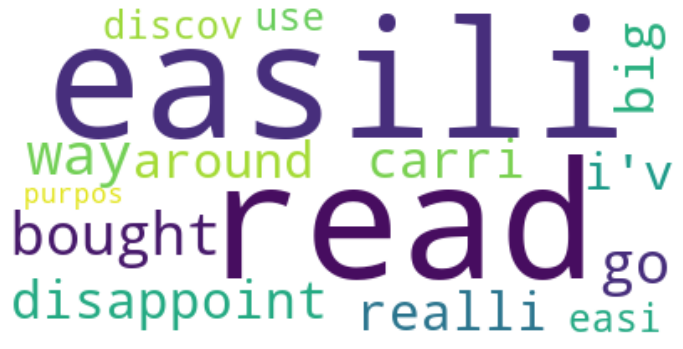

In [31]:
# Wordcloud of words from negative reviews by product

neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

# Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

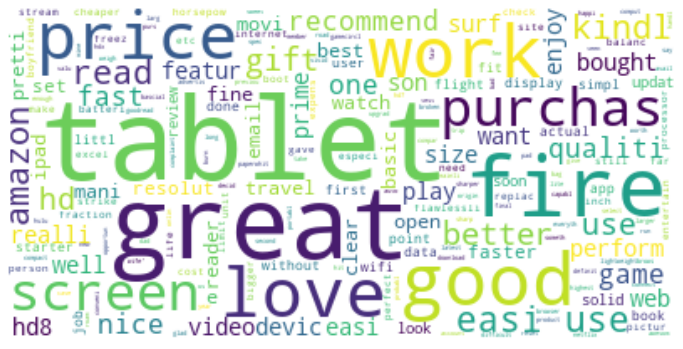

In [32]:
# Wordcloud of words from positive reviews by product

pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

# Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
# use the nltk FreqDist and then tabulate

from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

 tablet   great     use    fire    easi    work    good    love   price purchas 
     30      23      15      15      13      11      11      10      10       9 


In [34]:
# use the nltk FreqDist and then tabulate

from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

    easili       read     bought        way         go        i'm disappoint     realli        big      carri 
         2          2          1          1          1          1          1          1          1          1 


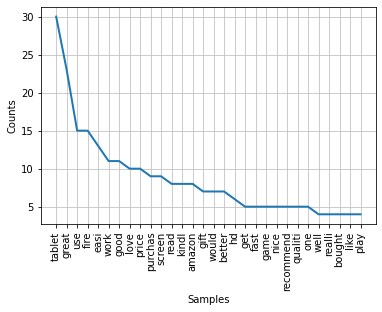

In [35]:
pos_freqdist.plot(30)

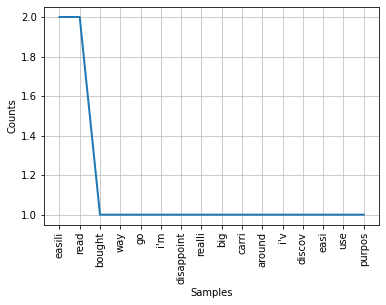

In [36]:
neg_freqdist.plot(30)